In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv(r'C:\Users\enriq\OneDrive\Escritorio\curso\alumno\prueba Machine Learning\proyecto Aguacate\src\data\avocado.csv')
df =  df.drop(columns='Unnamed: 0'	)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df['Datetime'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")

In [4]:
dfs = pd.DataFrame(df.groupby(by='Datetime')['AveragePrice'].mean())

In [5]:
df['month'] = df['Datetime'].dt.month
df.groupby('month').mean()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
month,,,,,,,,,,
1,1.311019,9.035654e+05,297091.451924,328309.637593,23469.554733,254693.975550,190706.250520,61666.720267,2321.004763,2016.500000
2,1.274387,1.018825e+06,356672.920885,348558.374931,28394.881146,285196.078073,213055.035712,68894.364792,3246.677569,2016.500000
3,1.332255,8.845054e+05,305386.962173,294504.626585,24952.196558,259658.362021,201308.615027,55152.129385,3197.617609,2016.411765
4,1.374380,8.801935e+05,314698.492251,291711.817500,25904.380947,247878.811068,189665.529252,55711.218697,2502.063120,2016.076923
5,1.346601,9.727150e+05,349946.910390,336679.188056,28377.930767,257710.995238,193425.140708,61144.593591,3141.260939,2015.928571
6,1.408964,9.293397e+05,337007.417141,302172.503879,28951.149985,261208.611175,202713.415943,53218.635417,5276.559815,2015.998454
7,1.462077,8.590482e+05,292245.798466,294714.809451,24521.787639,247558.728228,193294.104643,47831.054795,6433.567467,2016.071429
8,1.512514,8.036857e+05,290614.959295,282362.133625,19615.213554,211092.107201,166253.229174,41272.813348,3566.063967,2015.923077
9,1.572654,7.533192e+05,258561.835085,275712.053642,17425.176389,201618.164769,154073.842739,45327.096898,2217.225131,2016.000000


Len original: 18249
Len sin outliers en depth: 18040


c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AveragePrice', ylabel='AveragePrice'>

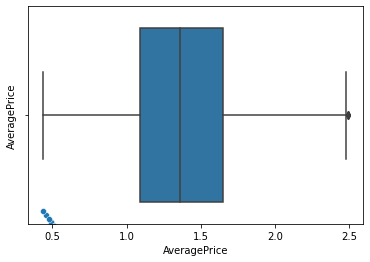

In [6]:
from scipy.stats import iqr
import seaborn as sns

def outliers_quantie(d, feature, param=1.5):  
        
    iqr_ = iqr(df[feature], nan_policy='omit')
    q1 = np.nanpercentile(df[feature], 25)
    q3 = np.nanpercentile(df[feature], 75)
    
    th1 = q1 - iqr_*param
    th2 = q3 + iqr_*param
    
    return df[(df[feature] >= th1) & (df[feature] <= th2)].reset_index(drop=True)

df5 = outliers_quantie(df, 'AveragePrice')
print("Len original:", len(df))
print("Len sin outliers en depth:", len(df5))
sns.scatterplot(data=df5, x='AveragePrice', y='AveragePrice');
sns.boxplot(df5['AveragePrice'])

In [7]:
df5

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Datetime,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12-27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12-20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12-13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12-06,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11-29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18035,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018-02-04,2
18036,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018-01-28,1
18037,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018-01-21,1
18038,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018-01-14,1


In [8]:
#df5.drop(columns= ['4046','XLarge Bags','year', 'type','mMnth', 'Date', 'region'], inplace = True )

In [9]:
df5['day'] = df5['Datetime'].dt.day
df3 = df5.groupby('day').mean()
df5['month'] = df5['Datetime'].dt.month
df4 = df5.groupby('month').mean()

<AxesSubplot:xlabel='day', ylabel='AveragePrice'>

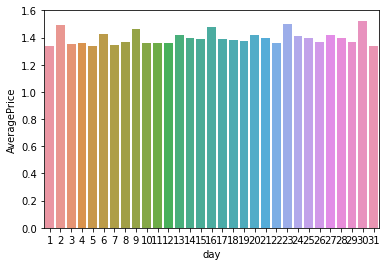

In [10]:
sns.barplot(x= df3.index, y= 'AveragePrice', data = df3)

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

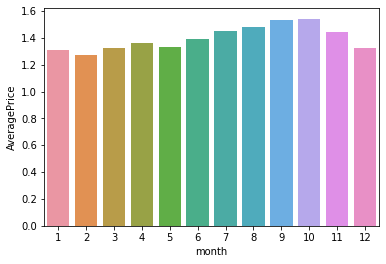

In [11]:
sns.barplot(x= df4.index, y= 'AveragePrice', data = df4)

In [12]:
dfs = pd.DataFrame(df5.groupby(by='Datetime')['AveragePrice'].mean())

<AxesSubplot:xlabel='Datetime'>

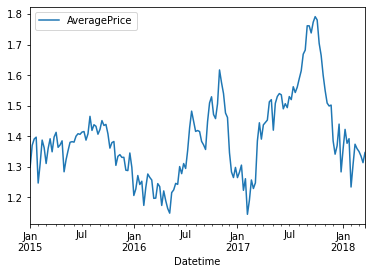

In [13]:
dfs.plot()


In [14]:
rolling = dfs.rolling(window=2).mean()

In [15]:
dfs

,AveragePrice
Datetime,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037
...,...
2018-02-25,1.359630
2018-03-04,1.350185
2018-03-11,1.335093


Text(0.5, 1.0, 'rolling')

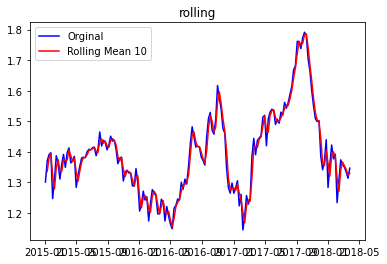

In [16]:
plt.plot(dfs, color='blue', label='Orginal')
plt.plot(rolling.dropna(), color='red', label='Rolling Mean 10')
plt.legend()
plt.title("rolling")

In [17]:
from statsmodels.tsa.stattools import adfuller

adfuller(dfs['AveragePrice'])[1]

0.12125524216748246

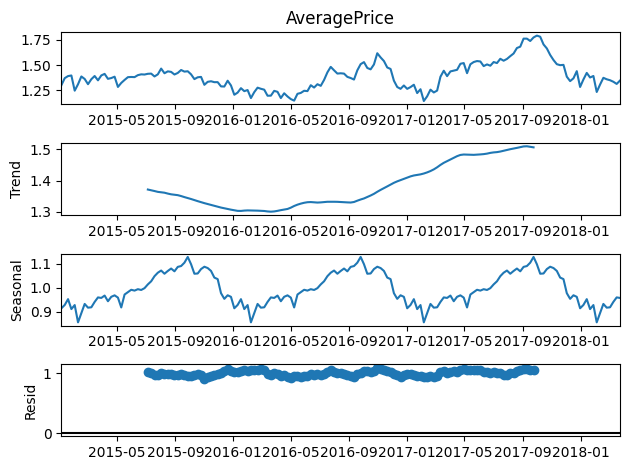

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(dfs['AveragePrice'], model='multiplicative')
plt.style.use("default")
result_mul.plot();

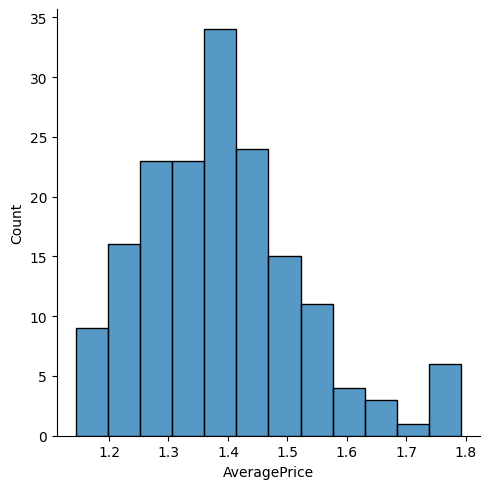

In [19]:
sns.displot(dfs['AveragePrice'])

In [20]:

from scipy.stats import shapiro
from scipy.stats import skew

print(shapiro(dfs['AveragePrice']).pvalue)
print("Asimetria:", skew(df5['AveragePrice']))

6.079438389861025e-05
Asimetria: 0.3393546015838414


In [21]:
dfs['AveragePrices'] = np.log(dfs['AveragePrice'])

In [22]:
print(shapiro(dfs['AveragePrices']).pvalue)
print("Asimetria:", skew(dfs['AveragePrices']))

0.00766038941219449
Asimetria: 0.477887229458336


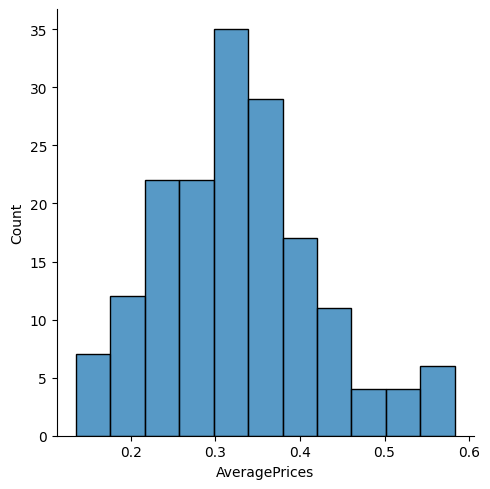

In [23]:
sns.displot(dfs['AveragePrices'])

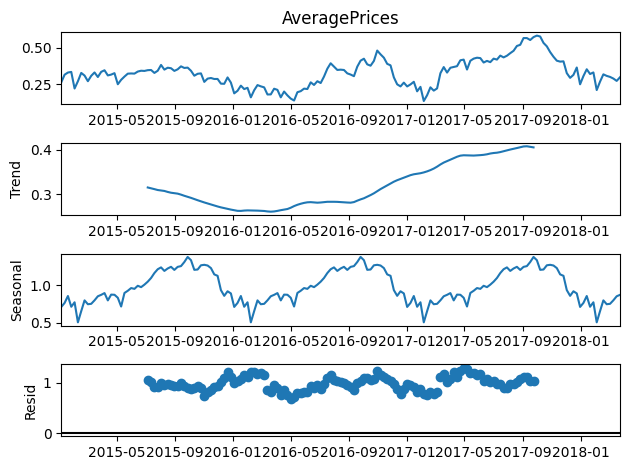

In [24]:
result_mul = seasonal_decompose(dfs['AveragePrices'], model='multiplicative')
plt.style.use("default")
result_mul.plot();

In [25]:
adfuller(dfs['AveragePrices'])[1]

0.0921700360017994

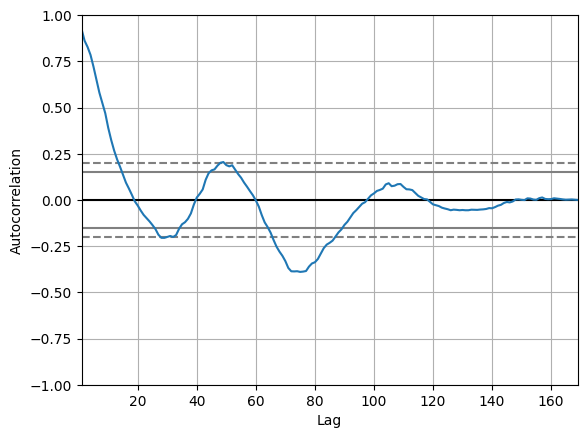

In [26]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dfs['AveragePrices']);

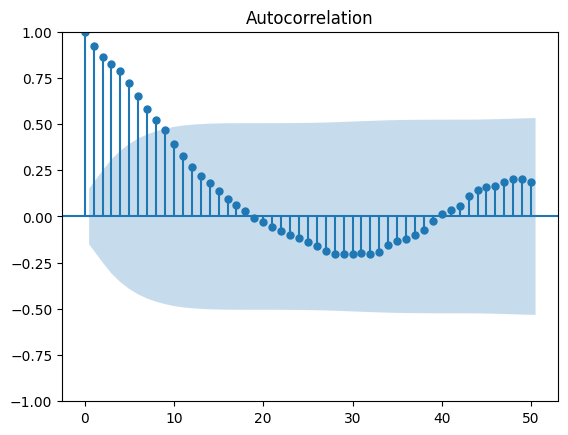

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(dfs['AveragePrices'], lags=50);

In [28]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2015-01-04 to 2018-03-25
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AveragePrice   169 non-null    float64
 1   AveragePrices  169 non-null    float64
dtypes: float64(2)
memory usage: 4.0 KB


In [29]:
train = dfs['AveragePrices'][:140]
test = dfs['AveragePrices'][140:]

In [47]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error

model = auto_arima(
    train,
    start_p=1,
    start_q=1,
    max_d=3,
    max_p=5,
    max_q=5,
    stationary=False,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-532.169, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-533.585, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-532.449, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-532.951, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-535.047, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.689 seconds


In [48]:
pred = model.predict(29)

In [51]:
import pickle
pickle.dump(model, open('Arima.pkl','wb'))

In [49]:
from sklearn.metrics import mean_absolute_error, r2_score

In [50]:
print("MAE", mean_absolute_error(test.values, pred))
print('el score en test es:', r2_score(test.values, pred) )

MAE 0.18424734909657595
el score en test es: -2.644555664038037


In [34]:
test.values

array([0.56611698, 0.55282896, 0.57276796, 0.58305326, 0.57694705,
       0.53306141, 0.50954703, 0.47011936, 0.43819463, 0.41131218,
       0.4049094 , 0.40688385, 0.32596752, 0.29377459, 0.31406702,
       0.36457881, 0.24960515, 0.30584938, 0.35248098, 0.32000135,
       0.33090119, 0.21032095, 0.26776277, 0.3177801 , 0.30721233,
       0.30024176, 0.28900065, 0.2728504 , 0.29776991])

In [35]:
pred

2017-09-10    0.566241
2017-09-17    0.566241
2017-09-24    0.566241
2017-10-01    0.566241
2017-10-08    0.566241
2017-10-15    0.566241
2017-10-22    0.566241
2017-10-29    0.566241
2017-11-05    0.566241
2017-11-12    0.566241
2017-11-19    0.566241
2017-11-26    0.566241
2017-12-03    0.566241
2017-12-10    0.566241
2017-12-17    0.566241
2017-12-24    0.566241
2017-12-31    0.566241
2018-01-07    0.566241
2018-01-14    0.566241
2018-01-21    0.566241
2018-01-28    0.566241
2018-02-04    0.566241
2018-02-11    0.566241
2018-02-18    0.566241
2018-02-25    0.566241
2018-03-04    0.566241
2018-03-11    0.566241
2018-03-18    0.566241
2018-03-25    0.566241
Freq: W-SUN, dtype: float64

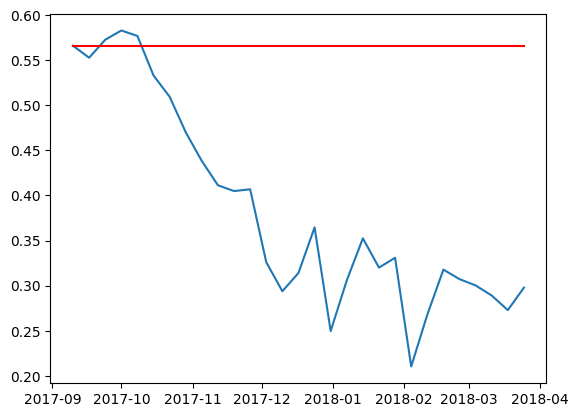

In [36]:
plt.plot(test)
plt.plot(pred,color='red');

In [37]:
model = auto_arima(
    train,
    start_p=1,
    start_q=1,
    max_d=3,
    max_p=7,
    max_q=7,
    stationary=True,
    trace=True,
    m=4
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[4] intercept   : AIC=-534.070, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=-287.225, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=-537.713, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=-459.191, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=85.902, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=-536.312, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[4] intercept   : AIC=-535.924, Time=0.44 sec
 ARIMA(1,0,0)(1,0,1)[4] intercept   : AIC=-535.852, Time=0.39 sec
 ARIMA(1,0,0)(0,0,1)[4] intercept   : AIC=-537.851, Time=0.23 sec
 ARIMA(1,0,0)(0,0,2)[4] intercept   : AIC=-535.852, Time=0.40 sec
 ARIMA(1,0,0)(1,0,2)[4] intercept   : AIC=-533.857, Time=0.45 sec
 ARIMA(0,0,0)(0,0,1)[4] intercept   : AIC=-355.556, Time=0.10 sec
 ARIMA(2,0,0)(0,0,1)[4] intercept   : AIC=-536.102, Time=0.30 sec
 ARIMA(1,0,1)(0,0,1)[4] intercept   : AIC=-536.210, Time=0.39 sec
 ARIMA(2,0,1)(0,0,1)[4] intercept  

In [38]:
pred = model.predict(29)
print("MAE", mean_absolute_error(test.values, pred))

MAE 0.05830228648285329


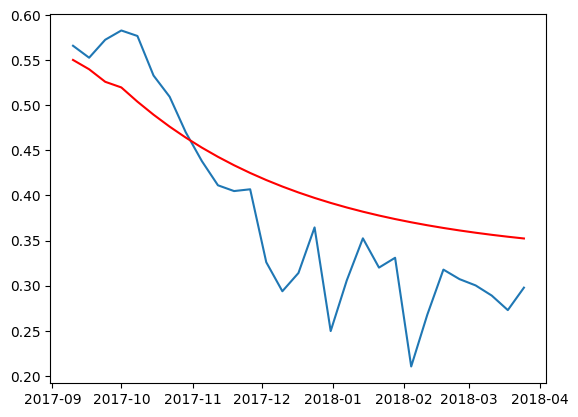

In [39]:
plt.plot(test)
plt.plot(pred,color='red');

In [45]:
import pickle

In [46]:
pickle.dump(model, open('arima.pkl','wb'))

In [40]:
from cmath import e


test_real= e**test
pred_real= e**pred

In [41]:
print("MAE", mean_absolute_error(test_real, pred_real))


MAE 0.08501638874793911


In [42]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error, explained_variance_score, r2_score, mean_absolute_percentage_error

print('el mae es:', mae(test_real, pred_real) )
#print( 'el mean_squared_error es', mean_squared_error(y_test, y_pred))
print('el score en test es:', r2_score(test_real, pred_real) )
#print('el score en train es:', model.score(X_train, y_train))
#print('el % mae es:', mean_absolute_percentage_error(y_test, y_pred) )

el mae es: 0.08501638874793911
el score en test es: 0.6620399633894285


In [43]:
train.to_csv('train.csv')

In [44]:
test.to_csv('test.csv')